<a href="https://colab.research.google.com/github/maja74maja74/CSC302_HW3/blob/main/Matt_Jackson__HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier. 

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DATA/WorldCupMatches.csv")

In [ ]:
df.head

**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year. 

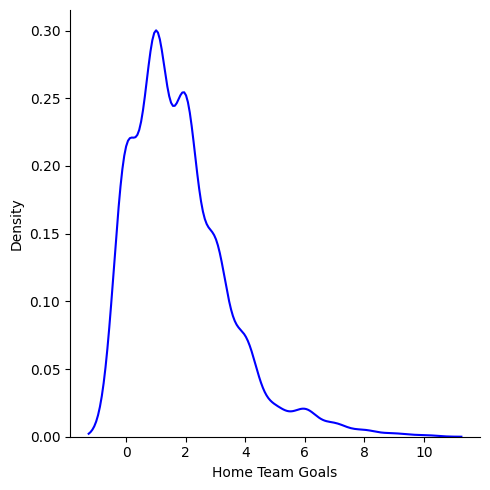

In [ ]:
sns.displot(data = df, x="Home Team Goals", color = "blue", kind = 'kde')

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

Text(0.5, 0, "['1930', '1950', '1970', '1990', '2010']")

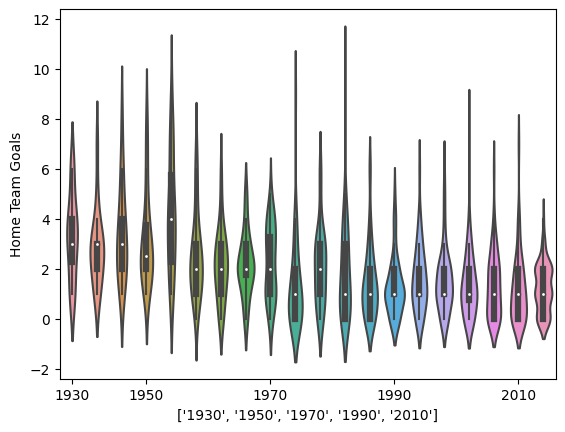

In [ ]:
sns.violinplot(x= 'Year', y = 'Home Team Goals', data = df)
plt.xticks([0, 3, 8, 13, 18])
plt.xlabel(['1930', '1950', '1970', '1990', '2010'])


In [ ]:
ax.set(xticks=([0, 3, 8, 13, 18]))
ax.set(xticklabels = (['1930', '1950', '1970', '1990', '2010']))

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [5]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import joypy as jp
from joypy import joyplot



<Figure size 640x480 with 0 Axes>

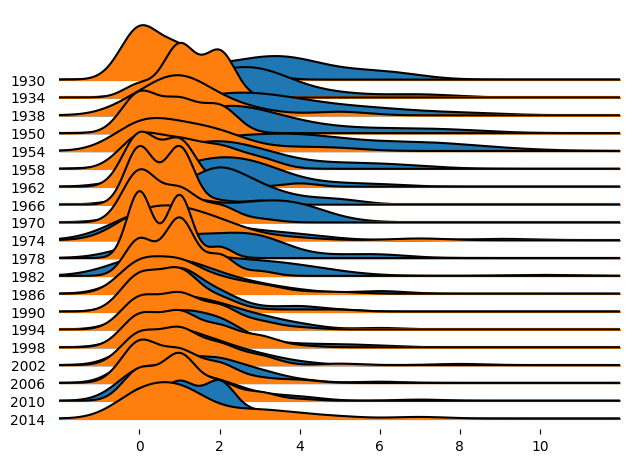

In [18]:
plt.figure()
ax, fig = joyplot(
    data =df[['Home Team Goals', 'Away Team Goals', 'Year']],
    by = 'Year')
    

<ipython-input-120-3b4b5d6d46a1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 640x480 with 0 Axes>

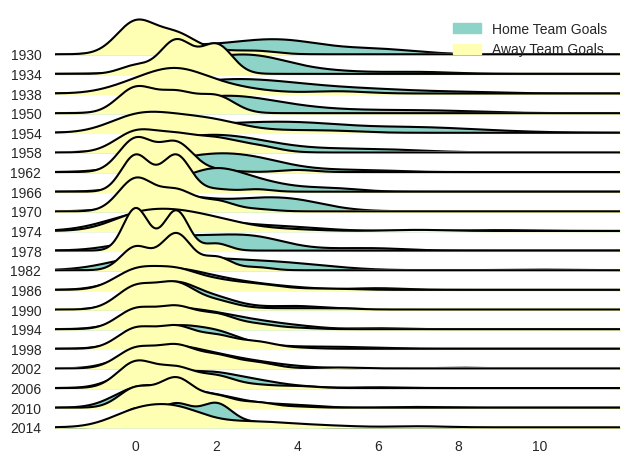

In [120]:
from matplotlib import legend
import joypy
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.style.use('seaborn-white')
fig, axes = joypy.joyplot(df, column=["Home Team Goals", "Away Team Goals"], by="Year", legend= 'True')
plt.show()

    

**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line. 

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals. 



In [34]:
df2 = df.groupby('Home Team Initials')['Home Team Goals'].sum().sort_values(ascending=False).to_frame().reset_index()

In [35]:
df2.head

<bound method NDFrame.head of    Home Team Initials  Home Team Goals
0                 BRA              180
1                 ARG              111
2                 FRG               99
3                 ITA               99
4                 HUN               73
..                ...              ...
72                CZE                0
73                SCG                0
74                HAI                0
75                ANG                0
76                ZAI                0

[77 rows x 2 columns]>

<Axes: xlabel='Home Team Initials', ylabel='Home Team Goals'>

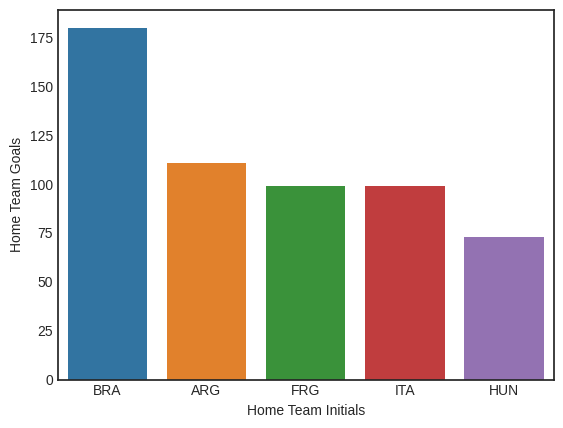

In [38]:
from seaborn.categorical import barplot
barplot(x='Home Team Initials', y='Home Team Goals', data=df2.head(5))

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



In [65]:
from matplotlib import legend
import joypy
import matplotlib.pyplot as plt


<Figure size 640x480 with 0 Axes>

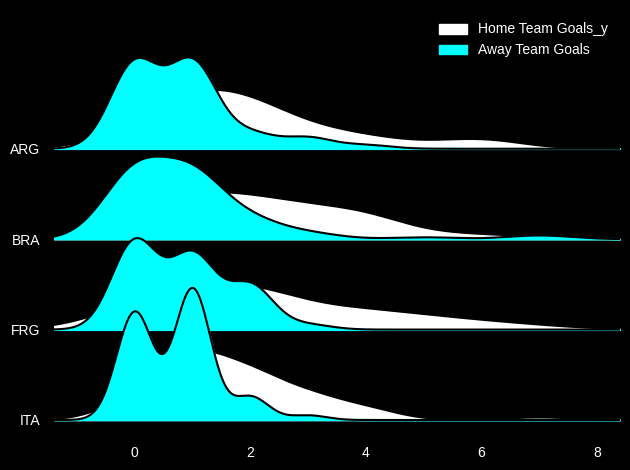

In [119]:
from numpy.ma.extras import isin
df3 = pd.read_csv("/content/drive/MyDrive/DATA/WorldCupMatches.csv", usecols=['Home Team Initials', 'Home Team Goals', 'Away Team Goals'] )
df4 = pd.merge(df2, df3, on = 'Home Team Initials', how = 'left')
df4 = df4.astype({'Home Team Goals_x':'int'})
df5 = df4[df4['Home Team Goals_x']>=99]
%matplotlib inline
plt.figure()
plt.style.use('dark_background')
fig, axes = joypy.joyplot(df5, column=["Home Team Goals_y", "Away Team Goals"], by="Home Team Initials", legend= 'True', color= ['white', 'cyan'],)
plt.show()

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [121]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


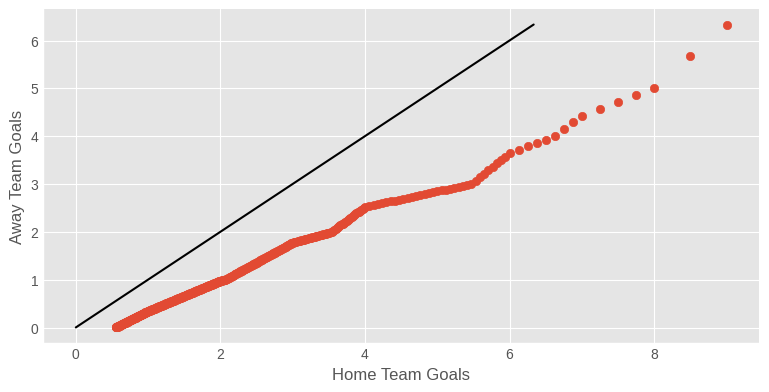

In [125]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
plt.style.use('ggplot') #this is to change the color theme. 
pplot(df, x="Home Team Goals", y="Away Team Goals", kind='qq', height=4, aspect=2, display_kws={"identity":True})


Home and away team goals are not directly proportional so they don't follow the normal distribution and fall below this line. I believe the representation on the graph would indicate that there is a greater probability of home team goals than away team goals.